In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import shap

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

shap.initjs()

In [2]:
df = pd.read_csv('data/all-data.csv', encoding='latin_1', header=None)
df.head(10)

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
7,positive,"In the third quarter of 2010 , net sales incre..."
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...
9,positive,"Operating profit totalled EUR 21.1 mn , up fro..."


In [3]:
# Rename columns
df.columns = ['sentiment', 'news_title']

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().values.any()

False

In [6]:
def clean_text(text):
    # Step 1: Convert text to lowercase
    text = text.lower()
    # Step 2: Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Step 3: Tokenization (split text into words)
    tokens = word_tokenize(text)
    # Step 4: Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Step 5: Join tokens back into cleaned text
    cleaned_text = " ".join(filtered_tokens)
    
    return cleaned_text

In [7]:
df['news_title'] = df['news_title'].apply(clean_text)
df.head()

,sentiment,news_title
0,neutral,according gran company plans move production r...
1,neutral,technopolis plans develop stages area less squ...
2,negative,international electronic industry company elco...
3,positive,new production plant company would increase ca...
4,positive,according company updated strategy years baswa...


In [8]:
# Split the data into features (X) and labels (y)
X = df["news_title"]
y = df["sentiment"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer and transform the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [9]:
# Create a logistic regression model
logistic_regression = LogisticRegression(C=1.5)

# Train the model on the training data
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.5)

In [10]:
y_pred = logistic_regression.predict(X_test_tfidf)

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.44      0.57       118
     neutral       0.74      0.96      0.84       563
    positive       0.81      0.50      0.62       287

    accuracy                           0.76       968
   macro avg       0.79      0.63      0.67       968
weighted avg       0.77      0.76      0.74       968


Confusion Matrix:


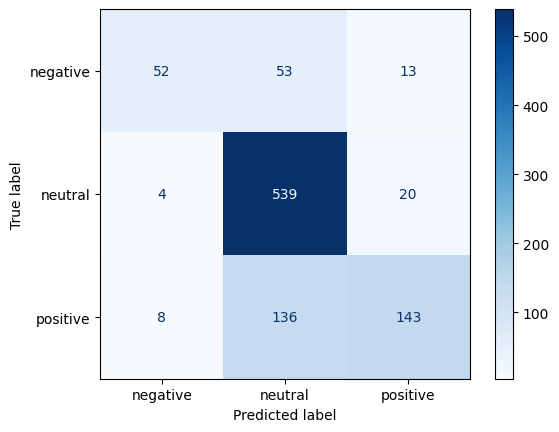

In [11]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

In [12]:
explainer = shap.Explainer(
    logistic_regression, X_train_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out()
)
shap_values = explainer(X_test_tfidf)

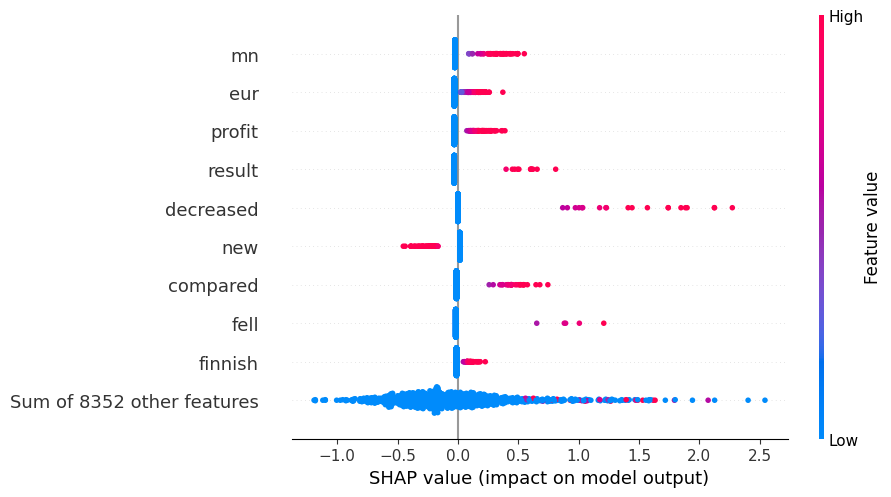

In [13]:
shap.plots.beeswarm(shap_values[:, :, 0])

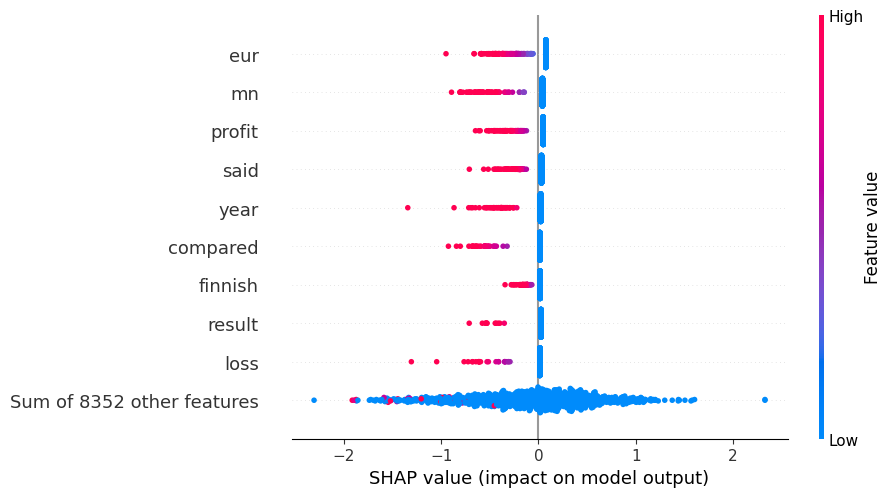

In [14]:
shap.plots.beeswarm(shap_values[:, :, 1])

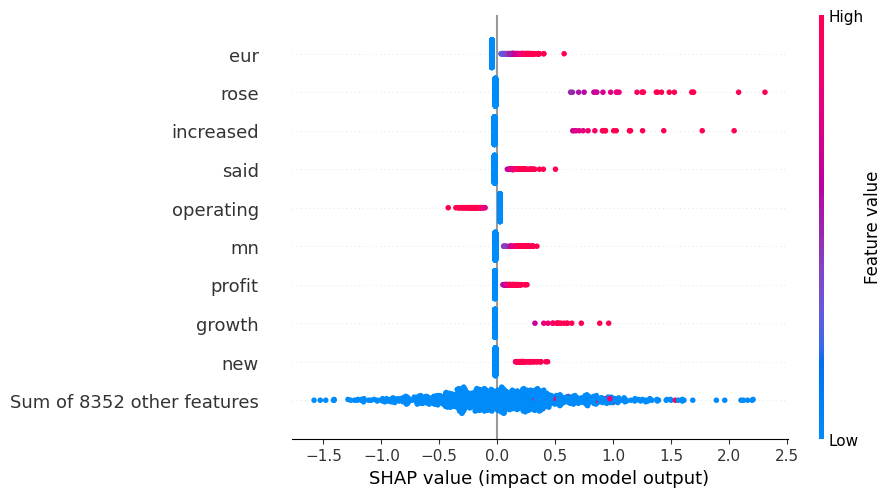

In [15]:
shap.plots.beeswarm(shap_values[:, :, 2])

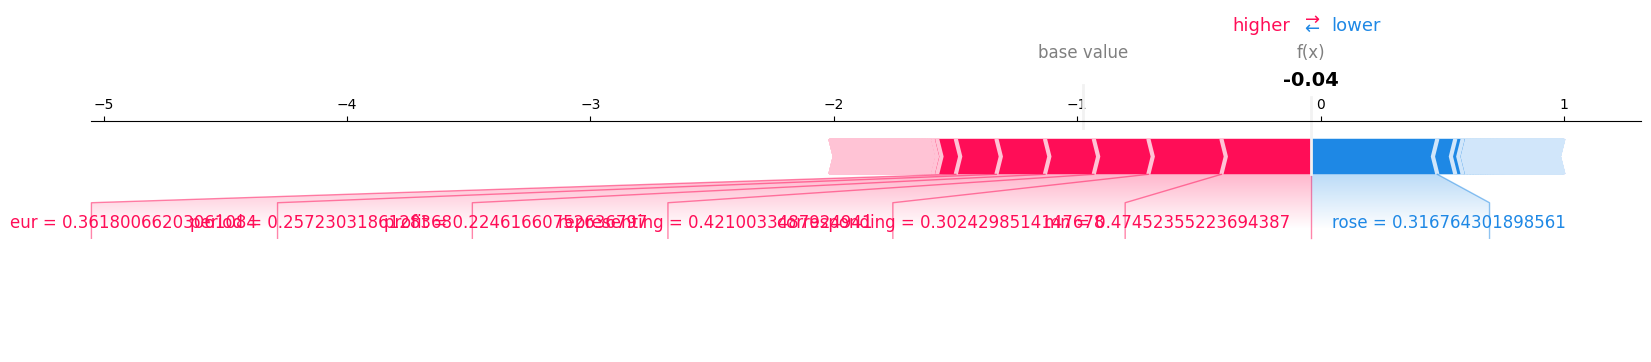

In [16]:
shap.plots.force(shap_values[22, :, 0], matplotlib=True)

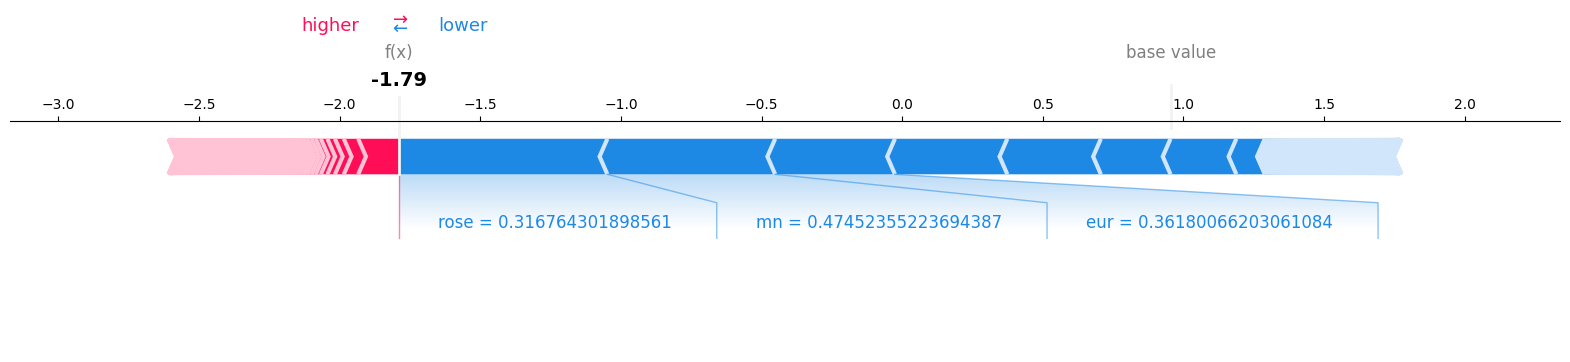

In [26]:
shap.initjs()
shap.plots.force(shap_values[22, :, 1], matplotlib=True)

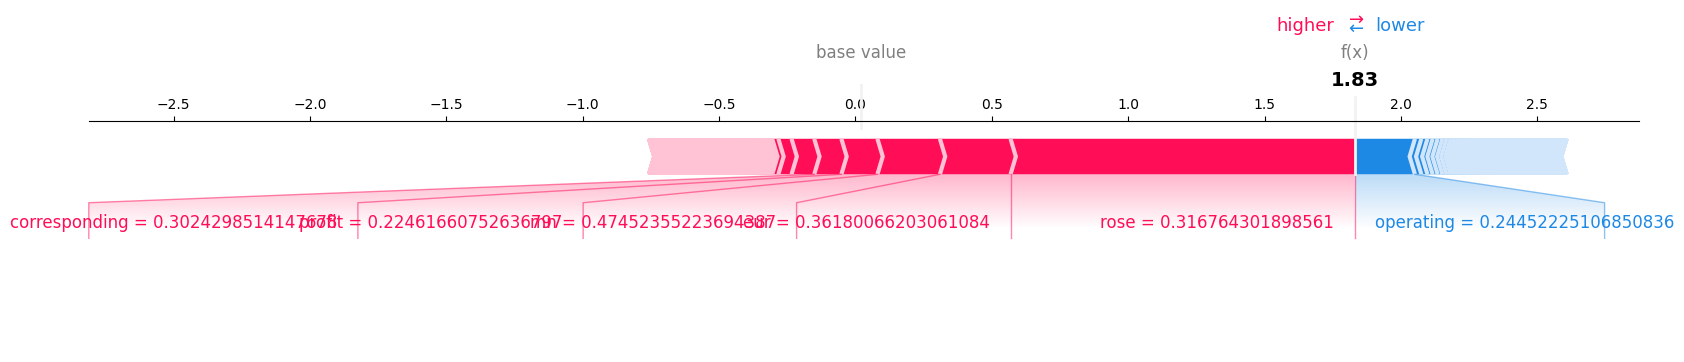

In [27]:
shap.plots.force(shap_values[22, :, 2], matplotlib=True)

In [70]:
for i in range(len(X_test)):
    label = y_test.iloc[i]
    if label == 'positive':
        print(X_test.iloc[i])
        print(i)

forestries also higher driven yesterday bullish analyst comment stora enso dagens industri dealers said
13
net sales however increase
19
operating profit rose eur mn eur mn corresponding period representing net sales
22
ruukki romania local arm finnish metal producer ruukki increased capital euro mln cash contribution reported september
35
agreement continue good cooperationand time release capital tied ourmachinery operation
40
lowering prices us competitors shows real estate market stabilised returned balance apartments acquiring fair price eyes clients
42
companies expect first orders already
43
net income life insurance doubled eur mn eur mn net income nonlife insurance rose eur mn eur mn corresponding period
44
however expects banks provide alternative financing
47
chain posted sales million euros full rise percent yearonyear
48
company advantage pricing seen significantly lower prices offered new unmanned stations
49
upm deliveries increased third quarter percent efficiency opera

In [71]:
y_pred[22]

'positive'

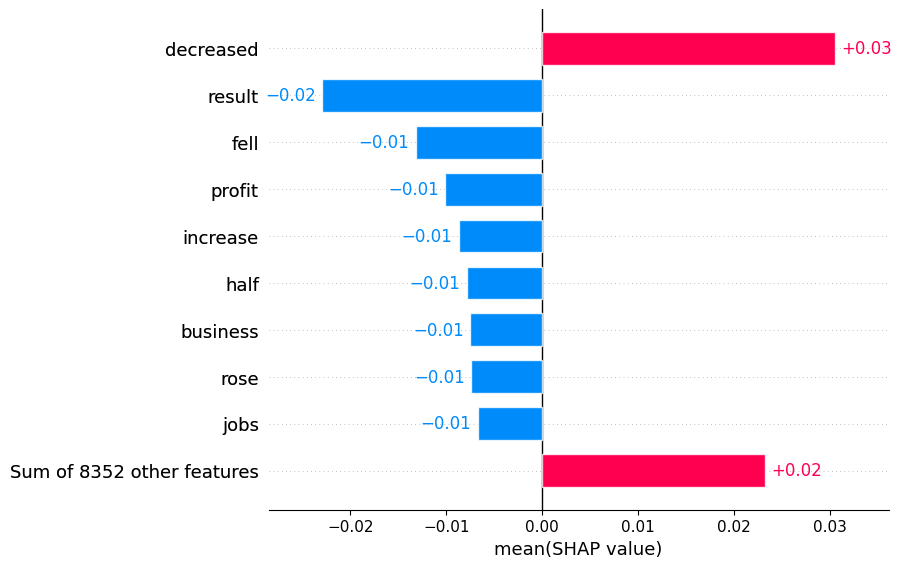

In [18]:
shap.plots.bar(shap_values[:, :, 0].mean(0))

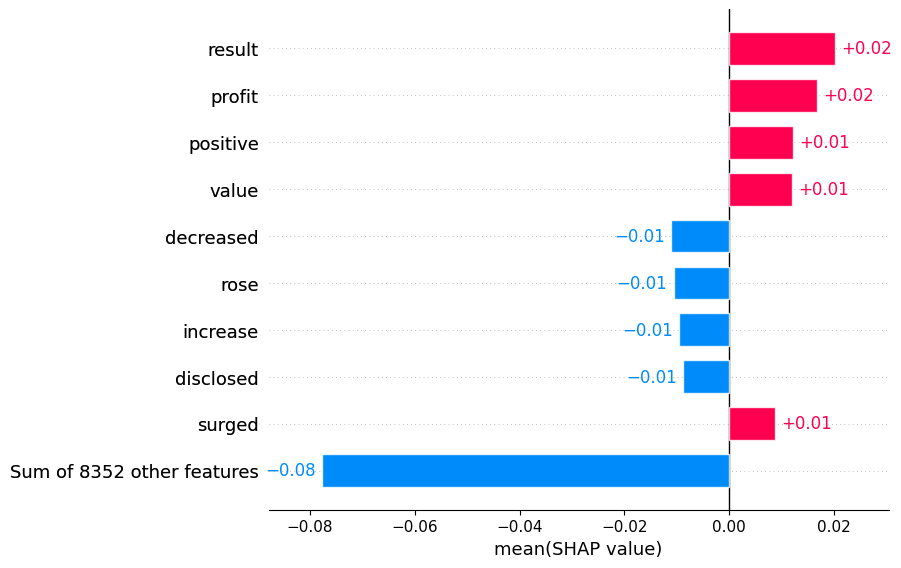

In [21]:
shap.plots.bar(shap_values[:, :, 1].mean(0))

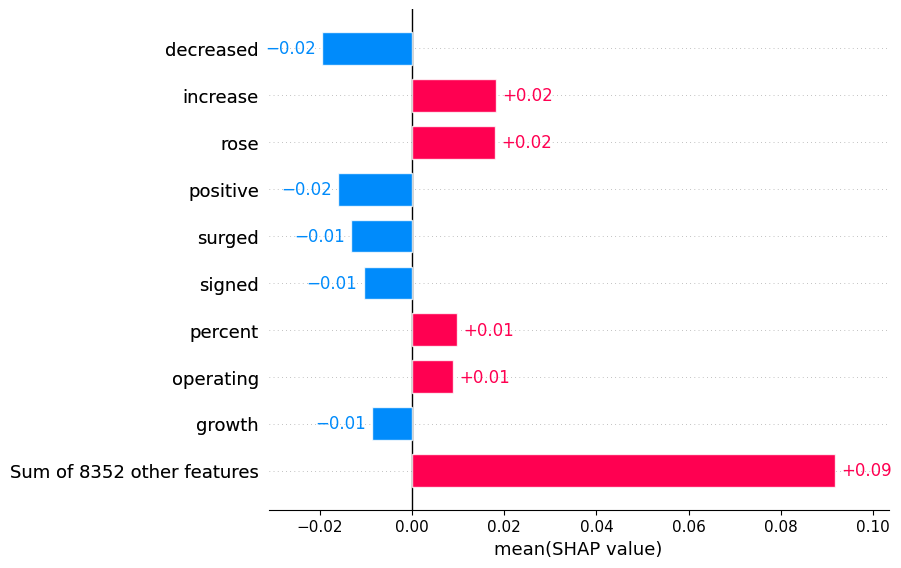

In [22]:
shap.plots.bar(shap_values[:, :, 2].mean(0))

In [46]:
shap_values[10, :, 2]

.values =
array([-0.,  0., -0., ..., -0., -0., -0.])

.base_values =
0.020075242201500587

.data =
array([0., 0., 0., ..., 0., 0., 0.])